# Exercise 13

## Analyze class homeworks


In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

data = pd.read_excel('../datasets/Consolidado_respuestas_escribir_v2.xlsx')
data.head()

,Genero,E1 - Examples of Time Series Analysis,E4 - Panel Data,E6 - Decison Trees,E8 - Ensemble Trees Overview,E10 - REST-API,E11 - Natural Language Processing Overview
0,M,One of the most valuable application of time s...,The main difference between panel data and tim...,Decision tree are a model used by the analytic...,They are used to make a better prediction than...,Es una forma de arquitectura de datos. Los mic...,NaN
1,F,ANÁLISIS DE SERIES DE TIEMPO – USOS \nEl análi...,Series de Tiempo vs Datos en Panel\nUna serie ...,TIPOS DE ÁRBOLES DE DECISIÓN Y APLICACIONES\nL...,ENSAMBLAJE EN MACHINE LEARNING\nLos métodos de...,Microservicios\nEl objetivo principal de la im...,NaN
2,M,Una serie de tiempo es una colección de datos ...,NaN,los arboles de decisión hacen parte de los alg...,Ensemble methods is a machine learning techniq...,El enfoque tradicional para el diseño de aplic...,"LexisNexis launched Lexis Analytics, a legal r..."
3,M,\nGiven that Time Series Analysis allows to un...,The difference between panel data and time ser...,Decision Trees Algorithms are machine function...,Ensemble methods in Tree Decision algorithms b...,Micro-services are defined as a type of softwa...,NaN
4,M,Time Series Analysis is concerned with the stu...,A time series is represented by a variable or ...,Decision trees are a popular supervised machin...,The ensemble method is a combination of severa...,A microservice is a type of information techno...,A commercial product which uses Natural Langua...


# Exercise 13.1

Analyze the writing patterns of each student

In [2]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier as RFC
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
import numpy as np
from sklearn.tree import DecisionTreeClassifier

In [3]:
data =data.rename(columns={"E1 - Examples of Time Series Analysis": "E1",
                     "E4 - Panel Data": "E4", 
                     "E6 - Decison Trees":"E6",
                     "E8 - Ensemble Trees Overview":"E8", 
                     "E10 - REST-API":"E10",
                     "E11 - Natural Language Processing Overview": "E11"});

### Dejando todos los textos en el mismo lenguaje.

Como cada uno de los estudiantes ha escrito las tareas en inglés o en español, según se siente más cómodo, es importante tener uniformidad de la información. Además se remplazaran todos los textos no entregados como "tareanoentregada" para que así si un estudiante tiene el patrón de no entregarlos también puede identificarse.

In [4]:
data=data.fillna('tareanoentregada')
data

,Genero,E1,E4,E6,E8,E10,E11
0,M,One of the most valuable application of time s...,The main difference between panel data and tim...,Decision tree are a model used by the analytic...,They are used to make a better prediction than...,Es una forma de arquitectura de datos. Los mic...,tareanoentregada
1,F,ANÁLISIS DE SERIES DE TIEMPO – USOS \nEl análi...,Series de Tiempo vs Datos en Panel\nUna serie ...,TIPOS DE ÁRBOLES DE DECISIÓN Y APLICACIONES\nL...,ENSAMBLAJE EN MACHINE LEARNING\nLos métodos de...,Microservicios\nEl objetivo principal de la im...,tareanoentregada
2,M,Una serie de tiempo es una colección de datos ...,tareanoentregada,los arboles de decisión hacen parte de los alg...,Ensemble methods is a machine learning techniq...,El enfoque tradicional para el diseño de aplic...,"LexisNexis launched Lexis Analytics, a legal r..."
3,M,\nGiven that Time Series Analysis allows to un...,The difference between panel data and time ser...,Decision Trees Algorithms are machine function...,Ensemble methods in Tree Decision algorithms b...,Micro-services are defined as a type of softwa...,tareanoentregada
4,M,Time Series Analysis is concerned with the stu...,A time series is represented by a variable or ...,Decision trees are a popular supervised machin...,The ensemble method is a combination of severa...,A microservice is a type of information techno...,A commercial product which uses Natural Langua...
5,M,A time series is a set of data that is taken i...,Aunque las variables de tiempo y los paneles d...,"Son modelos supervisados, se pueden usar arbol...",tareanoentregada,Los microservicios son servicios web con alcan...,tareanoentregada
6,M,tareanoentregada,Un paso crucial antes de empezar a predecir da...,Los árboles de decisión son algoritmos que per...,"En machine learning, los métodos de ensamble s...","La arquitectura de microservicios, o simplemen...",tareanoentregada
7,M,El análisis de series de tiempo (TSA) tiene un...,Un panel de datos consiste en un conjunto de o...,Los árboles de decisión consisten en unos méto...,Los métodos de ensamble permiten mejorar el de...,Los microservicios arquitectura de microservic...,tareanoentregada
8,F,Ejemplo 1: número de estudiantes semestrales i...,Una serie de tiempo busca modelar el comportam...,Son algoritmos de machine learning supervisado...,tareanoentregada,Los microservicios es un tipo de arquitectura ...,tareanoentregada
9,M,"Pronósticos de producción, análisis de inflaci...",Una serie de tiempo contiene observaciones de ...,Arboles de decisión \nLos árboles de decisión ...,El método de ensamblaje es una técnica de mach...,Los microservicios son una arquitectura para e...,tareanoentregada


In [5]:
import googletrans
from googletrans import Translator
translator = Translator()

In [6]:
#quitando los caracteres especiales de la data
cols = ['E1', 'E4', 'E6', 'E8', 'E10', 'E11']
data[cols] = data[cols].replace('[)°<&/*\n\t0123456789=,.:–(]','', regex=True)

In [7]:
#Traduciendo la data a inglés
data['E1'] = data['E1'].apply(translator.translate,src='es',dest='en').apply(getattr, args=('text',))
data['E4'] = data['E4'].apply(translator.translate,src='es',dest='en').apply(getattr, args=('text',))
data['E6'] = data['E6'].apply(translator.translate,src='es',dest='en').apply(getattr, args=('text',))
data['E8'] = data['E8'].apply(translator.translate,src='es',dest='en').apply(getattr, args=('text',))
data['E10'] = data['E10'].apply(translator.translate,src='es',dest='en').apply(getattr, args=('text',))
data['E11'] = data['E11'].apply(translator.translate,src='es',dest='en').apply(getattr, args=('text',))
data

,Genero,E1,E4,E6,E8,E10,E11
0,M,One of the most valuable application of time s...,The main difference between panel data and tim...,Decision tree are a model used by the analytic...,They are used to make a better prediction than...,It is a form of data architecture Microservice...,tareanodelivered
1,F,ANALYSIS OF TIME SERIES USES The analysis of t...,Time Series vs. Panel Data A time series allow...,TYPES OF DECISION TREES AND APPLICATIONS Decis...,ASSEMBLY IN MACHINE LEARNINGThe assembly metho...,Microservices The main goal of implementing a ...,tareanodelivered
2,M,A time series is a collection of data or value...,tareanodelivered,decision trees are part of supervised learning...,Ensemble methods is a machine learning techniq...,The traditional approach to application design...,LexisNexis launched Lexis Analytics a legal re...
3,M,Given that Time Series Analysis allows to unde...,The difference between panel data and time ser...,Decision Trees Algorithms are machine function...,Ensemble methods in Tree Decision algorithms b...,Micro-services are defined as a type of softwa...,tareanodelivered
4,M,Time Series Analysis is concerned with the stu...,A time series is represented by a variable or ...,Decision trees are a popular supervised machin...,The ensemble method is a combination of severa...,A microservice is a type of information techno...,A commercial product which uses Natural Langua...
5,M,A time series is a set of data that is taken i...,Although time variables and data panels are ba...,They are supervised models Decision trees can ...,tareanodelivered,Microservices are web services with very speci...,tareanodelivered
6,M,tareanodelivered,A crucial step before starting to predict data...,Decision trees are algorithms that belong to t...,In machine learning the assembly methods are m...,The microservices architecture or simply the m...,tareanodelivered
7,M,The time series analysis TSA has a diversity o...,A data panel consists of a set of cross-sectio...,Decision trees consist of learning methods for...,The assembly methods allow to improve the perf...,Microservices microservices architecture is a ...,tareanodelivered
8,F,Example number of semester students enrolled i...,A time series seeks to model the behavior of a...,They are machine learning algorithms supervise...,tareanodelivered,Microservices is a type of architecture for th...,tareanodelivered
9,M,Production forecasts inflation analysis and en...,A time series contains observations of a singl...,Decision trees Decision trees are graphical re...,The assembly method is a machine learning tech...,Microservices are an architecture for software...,tareanodelivered


In [8]:
#Creando una macrocolumna con todas las tareas de cada estudiante, para analizar la frecuencia de cada palabra.
data['Estudiante']= data[cols].apply(lambda row: ' '.join(row.values.astype(str)), axis=1)
data.head()

,Genero,E1,E4,E6,E8,E10,E11,Estudiante
0,M,One of the most valuable application of time s...,The main difference between panel data and tim...,Decision tree are a model used by the analytic...,They are used to make a better prediction than...,It is a form of data architecture Microservice...,tareanodelivered,One of the most valuable application of time s...
1,F,ANALYSIS OF TIME SERIES USES The analysis of t...,Time Series vs. Panel Data A time series allow...,TYPES OF DECISION TREES AND APPLICATIONS Decis...,ASSEMBLY IN MACHINE LEARNINGThe assembly metho...,Microservices The main goal of implementing a ...,tareanodelivered,ANALYSIS OF TIME SERIES USES The analysis of t...
2,M,A time series is a collection of data or value...,tareanodelivered,decision trees are part of supervised learning...,Ensemble methods is a machine learning techniq...,The traditional approach to application design...,LexisNexis launched Lexis Analytics a legal re...,A time series is a collection of data or value...
3,M,Given that Time Series Analysis allows to unde...,The difference between panel data and time ser...,Decision Trees Algorithms are machine function...,Ensemble methods in Tree Decision algorithms b...,Micro-services are defined as a type of softwa...,tareanodelivered,Given that Time Series Analysis allows to unde...
4,M,Time Series Analysis is concerned with the stu...,A time series is represented by a variable or ...,Decision trees are a popular supervised machin...,The ensemble method is a combination of severa...,A microservice is a type of information techno...,A commercial product which uses Natural Langua...,Time Series Analysis is concerned with the stu...


### Homogeneizar para poder analizar patrones.

Luego de hacer que los datos estén todos en la columna 'Estudiante', se procederá a quitar la puntuación y los stopwords, para poder encontrar patrones de escritura de cada uno.

In [9]:
est=data['Estudiante']

In [10]:
def remove_punctuation(text):
    import string
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)

In [11]:
est=est.apply(remove_punctuation)
est.head()

0    One of the most valuable application of time s...
1    ANALYSIS OF TIME SERIES USES The analysis of t...
2    A time series is a collection of data or value...
3    Given that Time Series Analysis allows to unde...
4    Time Series Analysis is concerned with the stu...
Name: Estudiante, dtype: object

In [12]:
# Term Frequency
vect = CountVectorizer(stop_words='english')
X_dtm = vect.fit_transform(est)
tf = pd.DataFrame(vect.fit_transform(est).toarray(), columns=vect.get_feature_names())
tf

,1990s,ab,abbreviation,abbreviations,ability,able,abnormal,abo,abroad,absence,...,yields,york,youll,youre,yt,ytj,zero,zhang,zone,zones
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,1,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
8,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Obteniendo las palabras más usadas por cada estudiante.

Con el fin de hallar patrones, se obtuvieron las palabras más usadas por cada estudiante.

FrequencyVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fe16178e810>,
                    color=None,
                    features=['1990s', 'ab', 'abbreviation', 'abbreviations',
                              'ability', 'able', 'abnormal', 'abo', 'abroad',
                              'absence', 'absolute', 'absorb', 'ac', 'academic',
                              'accelerate', 'accelerates', 'accelerating',
                              'acceleration', 'accept', 'acceptable',
                              'acceptance', 'accepted', 'accepts', 'access',
                              'accessed', 'accesses', 'accessibility',
                              'accessible', 'accessing', 'accident', ...],
                    n=None, orient='v')

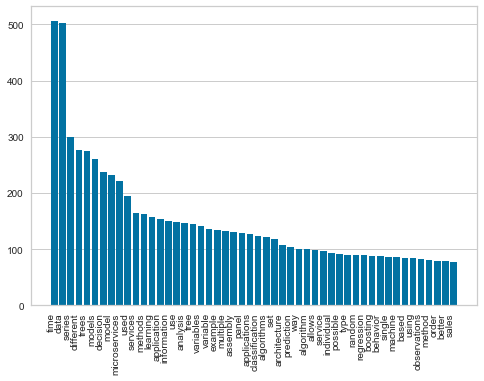

In [13]:
from yellowbrick.text import FreqDistVisualizer;
features   = vect.get_feature_names()
visualizer = FreqDistVisualizer(features=features, orient='v')
visualizer.fit(X_dtm)

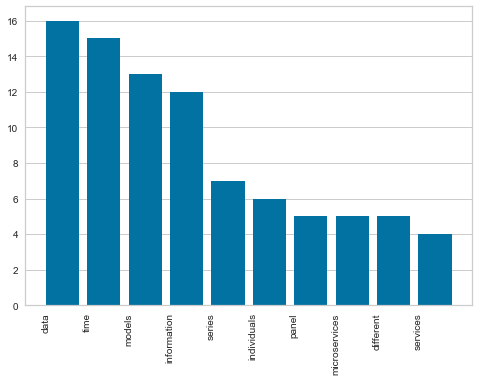

In [14]:
#Definicion de una función que solo obtenga las palabras de un estudiante
def estudiante(i):
    numero=est[[i]]
    vect = CountVectorizer(stop_words='english')
    X_dtm = vect.fit_transform(numero)
    features   = vect.get_feature_names()
    visualizer = FreqDistVisualizer(features=features,n=10, orient='v')
    visualizer.fit(X_dtm)
    
estudiante(5)

# Exercise 13.2

Evaluate the similarities of the homeworks of the students.

At a homework level, then as a student level.


### Haciendolo para el E1

In [15]:
from sklearn.metrics.pairwise import cosine_similarity

In [16]:
#remplazando las tareas no entregadas con numeros aleatorios
from random import choice
words={'word':['finicky','clear','puzzled','outgoing','soggy','busy','sexual','obsolete','thoughtless','quixotic',
      'odd','repulsive','successfully','amusing','cigarette','movie','rush','banana','death','nuance','underline',
      'text','unaware','herb','elegant','mosque','traffic','strikebreaker','flex','umbrella','visit','basin',
      'suffering','right','conception','affinity','case','aloof','rare','offer','kick','routine','pig','version',
      'traction','quote']}
words=pd.DataFrame(words)

In [17]:
data2=data

In [18]:
data2['E1']=np.where(data2['E1']=='tareanodelivered',words['word'],data2['E1'])
data2['E4']=np.where(data2['E4']=='tareanodelivered',words['word'],data2['E4'])
data2['E6']=np.where(data2['E6']=='tareanodelivered',words['word'],data2['E6'])
data2['E8']=np.where(data2['E8']=='tareanodelivered',words['word'],data2['E8'])
data2['E10']=np.where(data2['E10']=='tareanodelivered',words['word'],data2['E10'])
data2['E11']=np.where(data2['E11']=='tareanodelivered',words['word'],data2['E11'])
data2

,Genero,E1,E4,E6,E8,E10,E11,Estudiante
0,M,One of the most valuable application of time s...,The main difference between panel data and tim...,Decision tree are a model used by the analytic...,They are used to make a better prediction than...,It is a form of data architecture Microservice...,finicky,One of the most valuable application of time s...
1,F,ANALYSIS OF TIME SERIES USES The analysis of t...,Time Series vs. Panel Data A time series allow...,TYPES OF DECISION TREES AND APPLICATIONS Decis...,ASSEMBLY IN MACHINE LEARNINGThe assembly metho...,Microservices The main goal of implementing a ...,clear,ANALYSIS OF TIME SERIES USES The analysis of t...
2,M,A time series is a collection of data or value...,puzzled,decision trees are part of supervised learning...,Ensemble methods is a machine learning techniq...,The traditional approach to application design...,LexisNexis launched Lexis Analytics a legal re...,A time series is a collection of data or value...
3,M,Given that Time Series Analysis allows to unde...,The difference between panel data and time ser...,Decision Trees Algorithms are machine function...,Ensemble methods in Tree Decision algorithms b...,Micro-services are defined as a type of softwa...,outgoing,Given that Time Series Analysis allows to unde...
4,M,Time Series Analysis is concerned with the stu...,A time series is represented by a variable or ...,Decision trees are a popular supervised machin...,The ensemble method is a combination of severa...,A microservice is a type of information techno...,A commercial product which uses Natural Langua...,Time Series Analysis is concerned with the stu...
5,M,A time series is a set of data that is taken i...,Although time variables and data panels are ba...,They are supervised models Decision trees can ...,busy,Microservices are web services with very speci...,busy,A time series is a set of data that is taken i...
6,M,sexual,A crucial step before starting to predict data...,Decision trees are algorithms that belong to t...,In machine learning the assembly methods are m...,The microservices architecture or simply the m...,sexual,tareanodelivered A crucial step before startin...
7,M,The time series analysis TSA has a diversity o...,A data panel consists of a set of cross-sectio...,Decision trees consist of learning methods for...,The assembly methods allow to improve the perf...,Microservices microservices architecture is a ...,obsolete,The time series analysis TSA has a diversity o...
8,F,Example number of semester students enrolled i...,A time series seeks to model the behavior of a...,They are machine learning algorithms supervise...,thoughtless,Microservices is a type of architecture for th...,thoughtless,Example number of semester students enrolled i...
9,M,Production forecasts inflation analysis and en...,A time series contains observations of a singl...,Decision trees Decision trees are graphical re...,The assembly method is a machine learning tech...,Microservices are an architecture for software...,quixotic,Production forecasts inflation analysis and en...


In [19]:
E1=data2['E1']

In [20]:
vect = CountVectorizer(stop_words='english')
E1_dtm = vect.fit_transform(E1)
E1_1=E1_dtm.todense()

In [21]:
cs_E1=cosine_similarity(E1_1,E1_1)

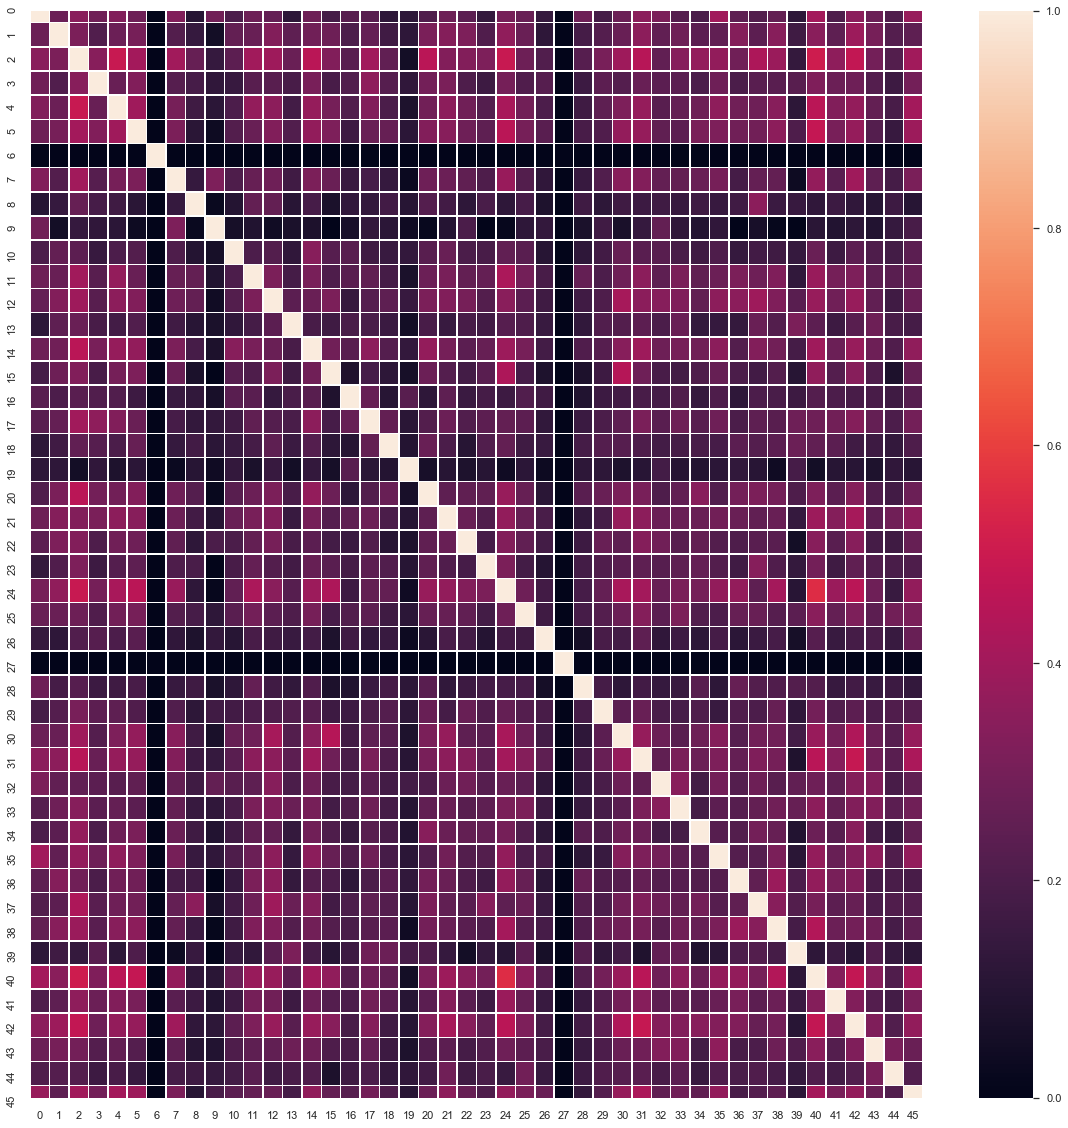

In [22]:
import numpy as np; np.random.seed(0)
import seaborn as sns; sns.set()
plt.figure(figsize=(20,20))
ax = sns.heatmap(cs_E1,linewidths=.5)

In [23]:
#Dejando solo la parte de abajo de la matriz
# Dado que la matriz anterior es simétrica, entonces es suficiente con seleccionar la matriz triangular inferior 
import numpy
tri_lower_no_diag = np.tril(cs_E1, k=-1)# matriz triangular inferior
tri_lower_no_diag

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.27704871, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.34473546, 0.31511664, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.27493774, 0.30118595, 0.29338918, ..., 0.        , 0.        ,
        0.        ],
       [0.20721559, 0.21880959, 0.21649177, ..., 0.30533778, 0.        ,
        0.        ],
       [0.37780233, 0.24572446, 0.39981905, ..., 0.27167819, 0.21393301,
        0.        ]])

In [24]:
maxElement = numpy.amax(tri_lower_no_diag)
maxElement

0.5580924573545218

In [25]:
resultE1 = numpy.where(tri_lower_no_diag == numpy.amax(tri_lower_no_diag))
listOfCordinates = list(zip(resultE1[0], resultE1[1]))
for cord in listOfCordinates:
    print('Los estudiantes con mayor coseno de similaridad : ', cord)

Los estudiantes con mayor coseno de similaridad :  (40, 24)


### Generalizando en una función

In [26]:
#funcion que retorna los estudiantes con mayor coeficiente de similiritud para cada tarea
def similiritud(h):
    E=h
    vect = CountVectorizer(stop_words='english')
    E_dtm = vect.fit_transform(E)
    E_=E_dtm.todense()
    cs_E=cosine_similarity(E_,E_)
    tri_lower_no_diag = np.tril(cs_E, k=-1)# matriz triangular inferior
    maxElement = numpy.amax(tri_lower_no_diag)
    resultE = numpy.where(tri_lower_no_diag == numpy.amax(tri_lower_no_diag))
    listOfCordinates = list(zip(resultE[0], resultE[1]))
    for cord in listOfCordinates:
        print('Los estudiantes con mayor coseno de similaridad : ', cord)
        
similiritud(data2['E6'])

Los estudiantes con mayor coseno de similaridad :  (42, 37)


In [27]:
similiritud(data2['E8'])

Los estudiantes con mayor coseno de similaridad :  (39, 30)


In [28]:
similiritud(data2['E10'])

Los estudiantes con mayor coseno de similaridad :  (42, 27)


In [29]:
 similiritud(data2['E11'])

Los estudiantes con mayor coseno de similaridad :  (30, 23)


### Haciendolo para el estudiante 0

In [30]:
data2_2=data.drop(columns=['Genero','Estudiante']).transpose()
data2_2

,0,1,2,3,4,5,6,7,8,9,...,36,37,38,39,40,41,42,43,44,45
E1,One of the most valuable application of time s...,ANALYSIS OF TIME SERIES USES The analysis of t...,A time series is a collection of data or value...,Given that Time Series Analysis allows to unde...,Time Series Analysis is concerned with the stu...,A time series is a set of data that is taken i...,sexual,The time series analysis TSA has a diversity o...,Example number of semester students enrolled i...,Production forecasts inflation analysis and en...,...,A time series deals with statistical data that...,Example To analyze the behavior of sales of a ...,There are several examples in real-life applic...,Example Sales of sunscreens A company dedicate...,In the first instance it is worth mentioning t...,Time series analyzes are statistical technique...,Time series are defined by different authors a...,Time series analysis is widely used in the con...,The three common uses that I identify in real ...,The time series analysis is important because ...
E4,The main difference between panel data and tim...,Time Series vs. Panel Data A time series allow...,puzzled,The difference between panel data and time ser...,A time series is represented by a variable or ...,Although time variables and data panels are ba...,A crucial step before starting to predict data...,A data panel consists of a set of cross-sectio...,A time series seeks to model the behavior of a...,A time series contains observations of a singl...,...,The main difference between the time series an...,Time series are in charge of studying an indiv...,In order to understand the difference between ...,The time series data refers to observations of...,A time series database is one that denotes a d...,A time series refers to one or more analysis v...,Data from Time Series Refers to the collection...,The time series show the behavior of a variabl...,"To delimit the differences, it is important to...",The time series data is a set of observations ...
E6,Decision tree are a model used by the analytic...,TYPES OF DECISION TREES AND APPLICATIONS Decis...,decision trees are part of supervised learning...,Decision Trees Algorithms are machine function...,Decision trees are a popular supervised machin...,They are supervised models Decision trees can ...,Decision trees are algorithms that belong to t...,Decision trees consist of learning methods for...,They are machine learning algorithms supervise...,Decision trees Decision trees are graphical re...,...,The fundamental idea of ​​a tree is the strati...,There are two Types of Decision Trees Classifi...,Types of decision trees and applicationsDecisi...,Decision trees use multiple algorithms to deci...,Decision tree-based Machine Learning predictio...,Decision trees are diagrams in which all possi...,Decision trees is one of the predictive modeli...,Decision trees were models initially created t...,Decision trees are a type of supervised learni...,Decision trees are a supervised learning stati...
E8,They are used to make a better prediction than...,ASSEMBLY IN MACHINE LEARNINGThe assembly metho...,Ensemble methods is a machine learning techniq...,Ensemble methods in Tree Decision algorithms b...,The ensemble method is a combination of severa...,busy,In machine learning the assembly methods are m...,The assembly methods allow to improve the perf...,thoughtless,The assembly method is a machine learning tech...,...,Assembly methods are meta-algorithms that comb...,aloof,In order to solve regression andor classificat...,The goal of any machine learning problem is to...,Assembly methods are algorithms that combine i...,Assembly or joint learning methods help improv...,"In statistics and machine learning, assembly m...",The assembly methods are mainly based on the i...,Ensembles or Assembly Methods are a family of ...,Assemblies or ensembles consist of methods tha...
E10,It is a form of data architecture Microservice...,Microservices The main goal of implementing a ...,The traditional appro

In [31]:
E0=data2_2[0]

In [32]:
vect = CountVectorizer(stop_words='english')
E0_dtm = vect.fit_transform(E0)
E0_1=E0_dtm.todense()

In [33]:
cs_E0=cosine_similarity(E0_1,E0_1)

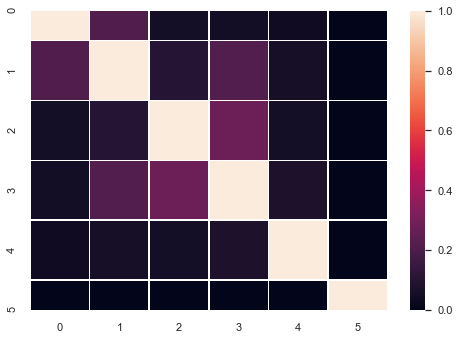

In [34]:
import numpy as np; np.random.seed(0)
import seaborn as sns; sns.set()
ax = sns.heatmap(cs_E0,linewidths=.5)

In [35]:
tri_lower_no_diag = np.tril(cs_E0, k=-1)# matriz triangular inferior
tri_lower_no_diag

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.20763753, 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.05240151, 0.10062519, 0.        , 0.        , 0.        ,
        0.        ],
       [0.05035029, 0.21233067, 0.2763024 , 0.        , 0.        ,
        0.        ],
       [0.04168337, 0.0608475 , 0.05127838, 0.07438973, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ]])

In [36]:
maxElement = numpy.amax(tri_lower_no_diag)
maxElement

0.2763023956378658

In [37]:
resultE0 = numpy.where(tri_lower_no_diag == numpy.amax(tri_lower_no_diag))
listOfCordinates = list(zip(resultE0[0], resultE0[1]))
for cord in listOfCordinates:
    print('Las tareas con mayor similitud para el estudiante son: ', cord)

Las tareas con mayor similitud para el estudiante son:  (3, 2)


### Definiendolo para cualquier estudiante

In [38]:
def est_simi(i):
    E=data2_2[i]
    vect = CountVectorizer(stop_words='english')
    E_dtm = vect.fit_transform(E)
    E_=E_dtm.todense()
    cs_E=cosine_similarity(E_,E_)
    tri_lower_no_diag = np.tril(cs_E, k=-1)# matriz triangular inferior
    maxElement = numpy.amax(tri_lower_no_diag)
    resultE = numpy.where(tri_lower_no_diag == numpy.amax(tri_lower_no_diag))
    listOfCordinates = list(zip(resultE[0], resultE[1]))
    for cord in listOfCordinates:
        print('Las tareas con mayor similitud para el estudiante son: ', cord)
    ax = sns.heatmap(cs_E,linewidths=.5)
    

Las tareas con mayor similitud para el estudiante son:  (5, 3)


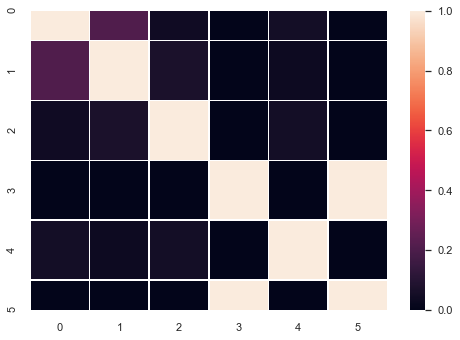

In [40]:
est_simi(10)

La primera función da los dos estudiantes con mayor similitud, se remplazaron los valores faltantes con palabras aleatorias para que no haya ruido.

Por su parte la segunda función da la similiritud entre estudiantes, con una gráfica. En caso de que un estudiante no haya presentado dos tareas, estas serán iguales.

# Exercise 13.3

Create a classifier to predict the gender of each student



In [51]:
y=data['Genero']
cols=['E1','E4','E6','E8','E10','E11']
x=data['Estudiante']
x

0     One of the most valuable application of time s...
1     ANALYSIS OF TIME SERIES USES The analysis of t...
2     A time series is a collection of data or value...
3     Given that Time Series Analysis allows to unde...
4     Time Series Analysis is concerned with the stu...
5     A time series is a set of data that is taken i...
6     tareanodelivered A crucial step before startin...
7     The time series analysis TSA has a diversity o...
8     Example number of semester students enrolled i...
9     Production forecasts inflation analysis and en...
10    The financial sector makes constant use of tim...
11    Time series are basically a collection of data...
12    Example Use of time series to forecast the vol...
13    To be able to predict at what times a theft ca...
14    Below I will briefly describe several examples...
15    The first and most frequent use in the TSA is ...
16    Real Cases of the Analysis of Time Series One ...
17    With each passing year, we are collecting 

In [52]:
vect = CountVectorizer(stop_words='english')
X_dtm = vect.fit_transform(x)

In [69]:
x_train, x_test, y_train, y_test = train_test_split(X_dtm, y, test_size=0.33)

In [70]:
from xgboost import XGBClassifier

clf = XGBClassifier()
clf

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [71]:
from sklearn import metrics
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
metrics.accuracy_score(y_pred, y_test.values)

0.6875

In [72]:
from sklearn.model_selection import cross_val_score
cross_val_score(clf, X_dtm, y, cv=10, scoring='accuracy').mean()

0.735

Con un xgboost obtenemos un acurracy de 0.6875. para la predicción del genero, con la unión de todas las tareas. Luego de un cv de 10 folds, obtenemos una media de 0.735.

# Exercise 13.4
Classify group members into different subgroups (minimum 3) according to a characteristic of your choice.

In [82]:
tf['Genero']=data['Genero']
tf

,1990s,ab,abbreviation,abbreviations,ability,able,abnormal,abo,abroad,absence,...,york,youll,youre,yt,ytj,zero,zhang,zone,zones,Genero
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,M
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,F
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,M
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,M
4,0,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,1,0,0,0,M
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,M
6,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,M
7,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,1,1,0,0,M
8,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,F
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,M


In [83]:
tf['Num. Palabras']=tf.sum(axis=1)
tf

,1990s,ab,abbreviation,abbreviations,ability,able,abnormal,abo,abroad,absence,...,youll,youre,yt,ytj,zero,zhang,zone,zones,Genero,Num. Palabras
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,M,640
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,F,763
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,M,645
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,M,721
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,M,1095
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,M,498
6,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,M,623
7,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,1,1,0,0,M,616
8,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,F,269
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,M,315


In [99]:
cols=['Genero','Num. Palabras','tareanodelivered']
data4=tf[cols]
data4['Genero']=np.where(data4['Genero']=='M',1,0)
data4

/Users/nelsonaldanamartinez/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Genero,Num. Palabras,tareanodelivered
0,1,640,1
1,0,763,1
2,1,645,1
3,1,721,1
4,1,1095,0
5,1,498,2
6,1,623,2
7,1,616,1
8,0,269,2
9,1,315,1


<IPython.core.display.Javascript object>


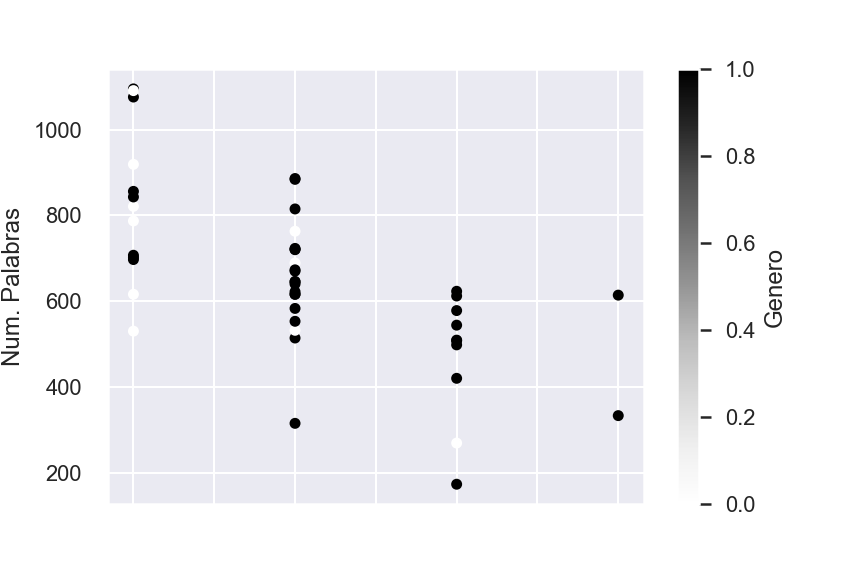

In [103]:
ax1 = data4.plot.scatter(y='Num. Palabras',
                      x='tareanodelivered',
                      c='Genero')

Después de hacer el análisis gráfico de los entregables, podemos concluir que las mujeres son las que menos participación tienen en la clase, además son las que menos fallas tienen al entregar las tareas, por eso el primer grupo que podemos definir son los estudiantes que han entregado todas las tareas, y de ellos podemos diferenciar entre hombres y mujeres. El segundo grupo son los estudiantes que no han entregado dos tareas, y que son hombres y mujeres.